In [1]:
import psutil

In [2]:
import os

current_pid = os.getpid()

In [3]:
current_pid

54158

In [4]:
def find_other_process():
    matches = []

    for proc in psutil.process_iter(['pid', 'name', 'cmdline']):
        if "python" in proc.name() and proc.status() =="running" and "ipykernel_launcher" in proc.cmdline() \
        and proc.pid != current_pid:
            if any(".profile" in p.path for p in proc.open_files()):
                matches.append(proc)
    assert len(matches) == 1
    return matches[0]


In [5]:
process = find_other_process()

In [6]:
process

psutil.Process(pid=54207, name='python3.12', status='running', started='17:35:22')

In [7]:
def read_swap():
    with open(path, "r") as f:
        return float(f.read().strip())

In [8]:
from pathlib import Path
path = Path("/tmp/ram")

In [9]:
def plot(rams):
    plt.clf()  # Clear the current figure
    from IPython import display
    display.clear_output(wait=True)

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(rams)), rams, marker='o', linestyle='-')
    plt.title('RAM Usage Over Time')
    plt.xlabel('Time')
    plt.ylabel('RAM Usage (GB)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [10]:
import time
from matplotlib import pyplot as plt

<Figure size 640x480 with 0 Axes>

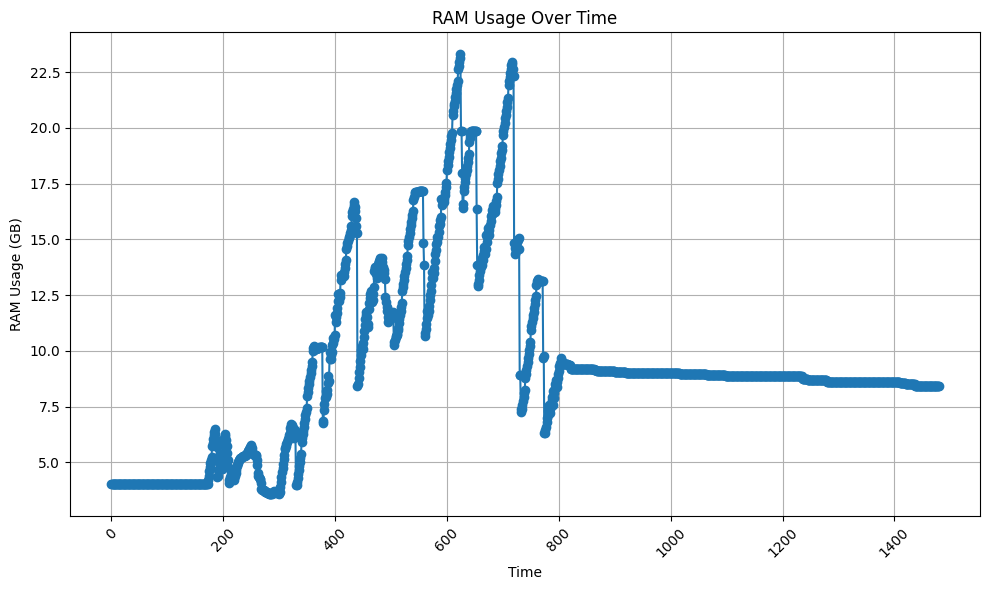

KeyboardInterrupt: 

In [11]:
rams = []
i=0
while True:
    i+=1
    
    time.sleep(0.1)
    non_swapped = round(process.memory_info().rss / (1024**3),3)
    swapped = psutil.swap_memory().used / (1024 **3)
    start_swap = read_swap()
    swapped_process = swapped - start_swap
    total_memory = non_swapped + swapped_process
    rams.append(total_memory)
#     print(f"RAM {total_memory} GB used ({swapped_process} swapped)")
    if i%10==0:
        plot(rams)

In [12]:
max(rams)

23.2988671875